In [1]:
import face_recognition

In [2]:
unknowns_img = face_recognition.load_image_file('unknowns.jpg')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols=1):
    n_images = len(images)
    figure = plt.figure()
    for i, image in enumerate(images):
        figure.add_subplot(cols, np.ceil(n_images / float(cols)), i + 1)             
        plt.imshow(image)
    figure.set_size_inches(np.array(figure.get_size_inches()) * n_images)
    plt.show()

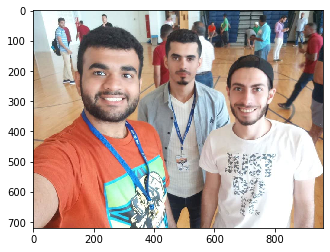

In [4]:
show_images([unknowns_img])

In [5]:
unknowns_face_locations = face_recognition.face_locations(unknowns_img)

In [6]:
unknowns_face_locations

[(219, 786, 374, 631), (128, 545, 235, 438), (160, 366, 345, 180)]

In [7]:
def crop(image, rect):
    top, right, bottom, left = rect
    return image[top:bottom, left:right]

In [8]:
unknowns_faces = []

for unknowns_face_location in unknowns_face_locations:
    unknowns_faces.append(crop(unknowns_img, unknowns_face_location))

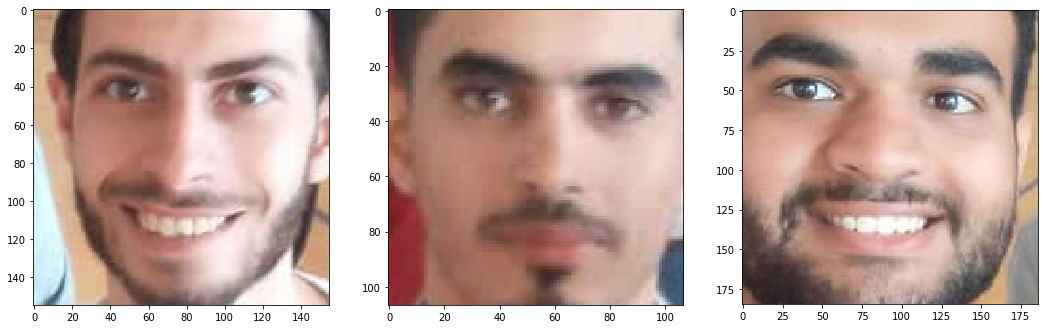

In [9]:
show_images(unknowns_faces)

In [10]:
unknowns_face_encodings = face_recognition.face_encodings(unknowns_img, unknowns_face_locations)

In [11]:
unknowns_face_encodings[0]

array([-1.51997745e-01,  8.89633223e-02, -4.57369871e-02, -4.68881056e-02,
       -1.19011402e-01, -2.44018435e-03, -4.97881770e-02, -7.29748011e-02,
        2.04009980e-01, -8.02605525e-02,  1.37377709e-01,  4.22575176e-02,
       -1.96474239e-01,  2.40445342e-02, -5.50512522e-02,  2.29964722e-02,
       -2.19467431e-01, -6.66723624e-02,  2.25619767e-02, -6.37098998e-02,
        1.63015500e-01,  3.40101011e-02,  2.27626190e-02,  1.55850723e-01,
       -1.21995479e-01, -3.32083166e-01, -1.51892737e-01, -1.22672655e-01,
        1.60529450e-01, -1.07041158e-01,  5.16317934e-02, -3.44276875e-02,
       -1.75920993e-01, -3.15620936e-03, -4.17066440e-02,  4.45266888e-02,
        3.42902029e-04, -5.40546998e-02,  2.32566282e-01, -1.32038444e-02,
       -1.30039245e-01, -3.67964339e-03,  5.36698196e-03,  2.94958115e-01,
        1.06930405e-01,  5.15105613e-02,  8.02568644e-02, -4.87903953e-02,
        1.35642231e-01, -1.64019898e-01,  1.14682019e-01,  1.81211352e-01,
        9.90680680e-02,  

In [12]:
known_img = face_recognition.load_image_file('mourad.jpg')

In [13]:
known_face_locations = face_recognition.face_locations(known_img)

In [14]:
known_face_locations[0]

(56, 126, 146, 36)

In [15]:
known_face = crop(known_img, known_face_locations[0])

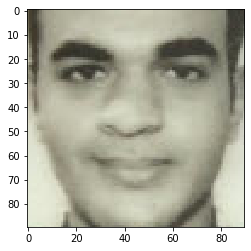

In [16]:
show_images([known_face])

In [17]:
known_face_encodings = face_recognition.face_encodings(known_img, known_face_locations)

In [18]:
known_face_encodings[0]

array([-0.07435738,  0.04612801,  0.05416438, -0.05758772,  0.01472325,
       -0.16718248,  0.00145913, -0.08055067,  0.13228494,  0.01419946,
        0.19127135, -0.05080248, -0.18277362, -0.09388857,  0.00474875,
        0.07555638, -0.07761598, -0.11753374, -0.09374682, -0.13403432,
       -0.01732817, -0.01107633,  0.04363939,  0.0548621 , -0.15394031,
       -0.28767678, -0.07058361, -0.10614904, -0.00315189, -0.01087771,
        0.04672567,  0.11416411, -0.23349082, -0.1032534 ,  0.05947058,
        0.06539792,  0.03306634,  0.04703587,  0.20238437,  0.03486224,
       -0.12582995,  0.08067043,  0.05943848,  0.26817799,  0.18949993,
        0.0348322 ,  0.01746704, -0.00858178,  0.05292024, -0.2210921 ,
        0.05860326,  0.1445059 ,  0.11272857, -0.0177191 ,  0.06490379,
       -0.12500551,  0.00376123,  0.11687079, -0.28481734,  0.11237679,
        0.07228265, -0.0731074 , -0.10355075, -0.0140933 ,  0.15214415,
        0.12895846, -0.11561073, -0.07073075,  0.18100993, -0.15

In [19]:
known_unknowns_face_distance = face_recognition.face_distance(unknowns_face_encodings, known_face_encodings[0])

In [20]:
known_unknowns_face_distance

array([0.80899793, 0.61762273, 0.46243649])

In [21]:
known_unknowns_face_compare = face_recognition.compare_faces(unknowns_face_encodings, known_face_encodings[0])

In [22]:
known_unknowns_face_compare

[False, False, True]

In [23]:
matches = [i for i, v in enumerate(known_unknowns_face_compare) if v]

In [24]:
matches

[2]

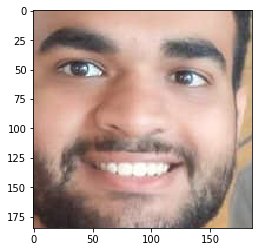

In [25]:
if unknowns_faces:
    show_images([unknowns_faces[i] for i in matches])
else:
    print('No match found!')